## Importing Libraries

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score

## Loading the dataset

In [94]:
df=pd.read_csv("sales.csv",index_col=0) #to rename the 0th column
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Checking for Dimensions , Defaults and Anomalities of Dataset

In [95]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [96]:
df.shape

(200, 4)

In [97]:
df.isnull().count()

TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64

In [98]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Data Visualisation

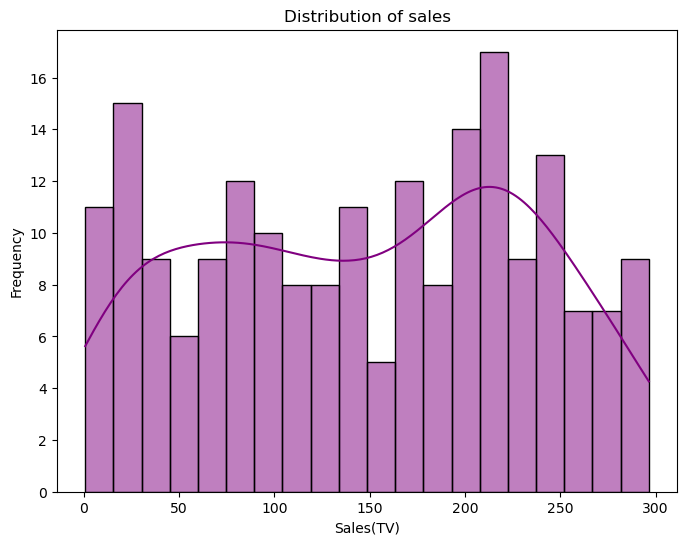

In [99]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x="TV",bins=20,color='purple',edgecolor='black',kde='True')
plt.title('Distribution of sales')
plt.xlabel('Sales(TV)')
plt.ylabel('Frequency')
plt.show()

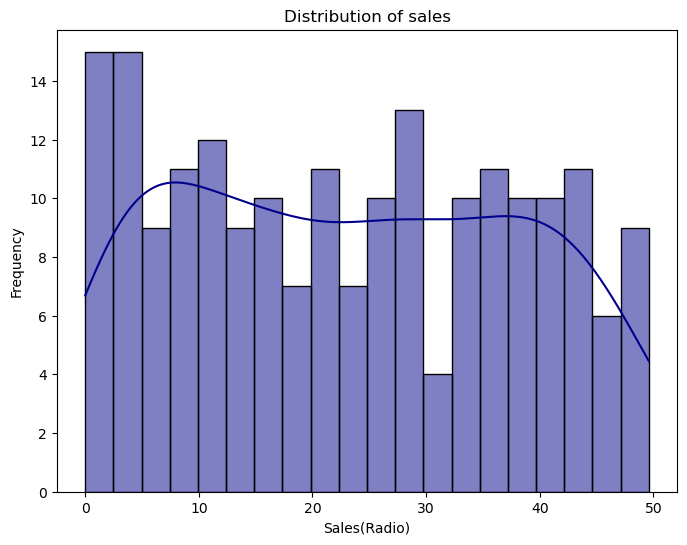

In [100]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x="Radio",bins=20,color='darkblue',edgecolor='black',kde='True')
plt.title('Distribution of sales')
plt.xlabel('Sales(Radio)')
plt.ylabel('Frequency')
plt.show()

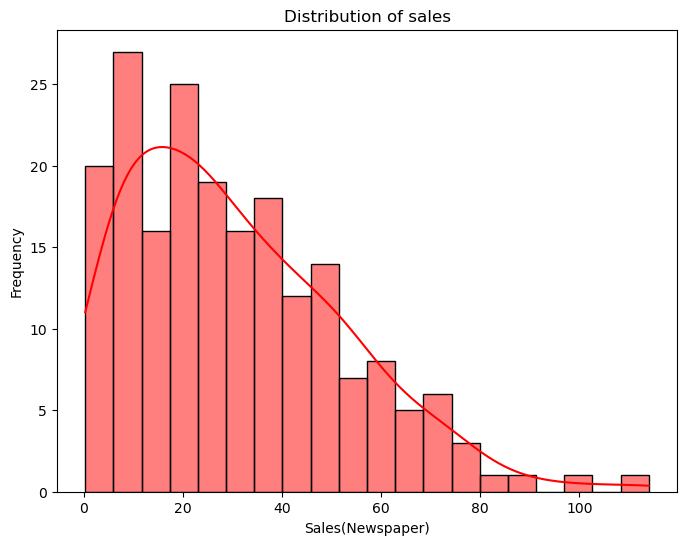

In [101]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x="Newspaper",bins=20,color='red',edgecolor='black',kde='True')
plt.title('Distribution of sales')
plt.xlabel('Sales(Newspaper)')
plt.ylabel('Frequency')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


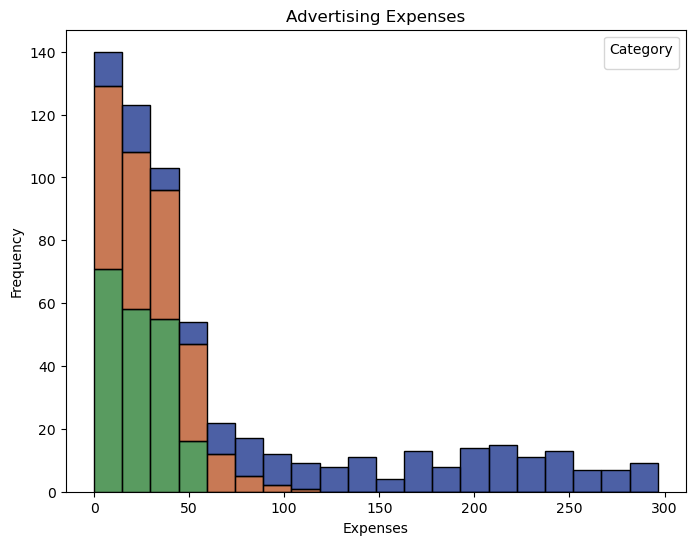

In [102]:
combined_df = pd.melt(df[['TV', 'Newspaper', 'Radio']], var_name='Category', value_name='Expenses')

plt.figure(figsize=(8, 6))
sns.histplot(data=combined_df, x='Expenses', bins=20, hue='Category', kde=False, alpha=0.7,palette='dark',multiple='stack')
plt.title('Advertising Expenses')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.legend(title='Category') 
#pd.melt to combine the three categories into 1 single category 'Category'and its values are stored in expenses

## Processing Data

In [103]:
x=df.drop('Sales',axis=1)
y=df['Sales']

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

## Model Training

In [105]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [108]:

mse = mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)


In [109]:
print("Mean Squared Error:{}".format(mse))
print("R2 Score:{}".format(r2))

Mean Squared Error:3.7967972367152223
R2 Score:0.8609466508230367


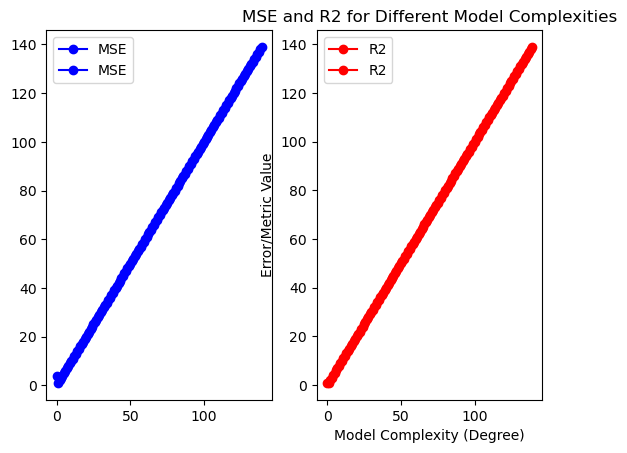

In [127]:
plt.subplot(1,2,1)
plt.plot(range(1, len(x_train)), range(1, len(x_train)),mse, marker="o", label='MSE', color='blue')
plt.legend()

# Plot R2
plt.subplot(1,2,2)
plt.plot(range(1, len(x_train)),range(1, len(x_train)), r2, marker='o', label='R2', color='red')
plt.legend()

# Add labels and legend
plt.xlabel('Model Complexity (Degree)')
plt.ylabel('Error/Metric Value')
plt.title('MSE and R2 for Different Model Complexities')


plt.show()